In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv(r'F:\College\SEM 7\19CCE495-Project Phase I\Dataset\Dataset_1_NCA_battery\Dataset_1_NCA_battery\CY25-1_1-#1.csv')
df.head()

,time/s,control/V/mA,Ecell/V,<I>/mA,Q discharge/mA.h,Q charge/mA.h,control/V,control/mA,cycle number
0,0.000,3500.0,3.149101,0.058311,0.0,0.001944,0.0,3500.0,2.0
1,0.014,3500.0,3.154381,3499.796569,0.0,0.015554,0.0,3500.0,2.0
2,0.070,3500.0,3.159463,3500.127389,0.0,0.070001,0.0,3500.0,2.0
3,0.202,3500.0,3.164467,3500.217622,0.0,0.198342,0.0,3500.0,2.0
4,0.412,3500.0,3.169628,3500.402831,0.0,0.402532,0.0,3500.0,2.0


In [23]:
Voltage=df['Ecell/V'].to_numpy()
print(Voltage.shape)
Current=df['<I>/mA'].to_numpy()
print(Current.shape)
Q_discharge=df['Q discharge/mA.h'].to_numpy()
print(Q_discharge.shape)
Q_charge=df['Q charge/mA.h'].to_numpy()
print(Q_charge.shape)

cycle_number=df['cycle number'].to_numpy()
print(cycle_number.shape)


(32900,)
(32900,)
(32900,)
(32900,)
(32900,)


In [29]:
Battery_Capacity = 3.5 # mAh
SOC = np.zeros(Voltage.shape)
for i in range(len(Voltage)):
    if Current[i]>0:
        SOC[i] = (Q_charge[i] / Battery_Capacity)*100
    else:
        SOC[i] = 100-(Q_discharge[i] / Battery_Capacity)*100

print(SOC.shape)



(32900,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

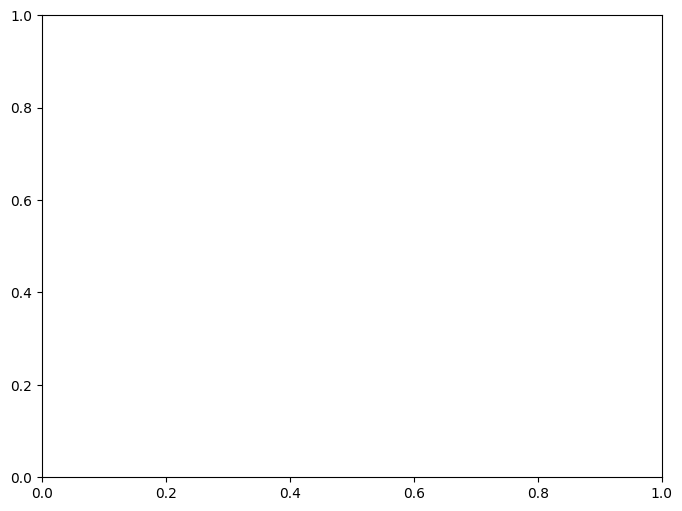

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

Voltage = df['Ecell/V'].to_numpy()
Current = df['<I>/mA'].to_numpy()
Q_discharge = df['Q discharge/mA.h'].to_numpy()
cycle_number = df['cycle number'].to_numpy()

Battery_Capacity = 3.5  # Ah (3500 mAh)

unique_cycles = np.unique(cycle_number)
max_cycle = unique_cycles.max()

fig, ax = plt.subplots(figsize=(8,6))

for cyc in unique_cycles:
    # Mask for this cycle's discharge segment
    mask = (cycle_number == cyc) & (Current < 0)
    
    if np.sum(mask) < 10:  # skip very short cycles
        continue
    
    # Extract data for this cycle only
    V = Voltage[mask]
    Qd = Q_discharge[mask]
    
    # ✅ RESET discharge capacity for this cycle
    Qd_rel = Qd - Qd[0]          # starts at 0 for this cycle
    SOC_cycle = (Qd_rel / Battery_Capacity)  # goes 1 → ~0
    
    # Color based on cycle progression
    color = plt.cm.viridis(cyc / max_cycle)
    ax.plot(SOC_cycle[::-1], V, color=color, linewidth=0.8)

ax.set_xlabel("SOC (0-1)")
ax.set_ylabel("Voltage (V)")
ax.set_title("Discharge Curves (Voltage vs SOC)")
ax.invert_xaxis()  # SOC from 1→0

# Add colorbar for cycle number
sm = ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=unique_cycles.min(), vmax=max_cycle))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Cycle Number")

plt.show()
